In [1]:
from random import gauss
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
sys.path.insert(2,'..')
import functions
import xgboost as xgb
from sklearn import preprocessing
import annualized_rv as arv
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor # Random Forest model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting model
from sklearn.ensemble import AdaBoostRegressor # AdaBoost model
import sklearn.ensemble as ensemble

import tensorflow as tf
from tensorflow import keras

import DataProcess

In [2]:
# reads in the historic implied vol data calculated in the dailyaverageIV notebook

aaplHistIV = pd.read_pickle('historicImpliedVolData/aapl_mean_iv_2017_2022.pkl')
googHistIV = pd.read_pickle('historicImpliedVolData/goog_mean_iv_2017_2022.pkl')
msftHistIV = pd.read_pickle('historicImpliedVolData/msft_mean_iv_2017_2022.pkl')
ndxHistIV = pd.read_pickle('historicImpliedVolData/ndx_mean_iv_2017_2022.pkl')
spyHistIV = pd.read_pickle('historicImpliedVolData/spc_mean_iv_2017_2022.pkl')




In [3]:
def modelandeval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE,RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test, y_pred)
    
    return RMSE, MAE, R2, MSE

In [4]:
X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [5]:
def modelandeval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    MSE,RMSE, MAE, R2 = DataProcess.evaluate_regression_metrics(y_test, y_pred)
    
    return RMSE, MAE, R2, MSE

Epoch 1/60


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4398 - val_loss: 2.7239
Epoch 2/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1518 - val_loss: 2.2855
Epoch 3/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0998 - val_loss: 2.0327
Epoch 4/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0959 - val_loss: 1.8693
Epoch 5/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0790 - val_loss: 1.7199
Epoch 6/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0641 - val_loss: 1.6290
Epoch 7/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0589 - val_loss: 1.5710
Epoch 8/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0512 - val_loss: 1.5282
Epoch 9/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0502 - val_loss: 1.4952
Epoch 10/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0558 - val_loss: 1.5165
Epoch 11/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0531 - val_loss: 1.4067
Epoch 12/60
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0486 - val_l

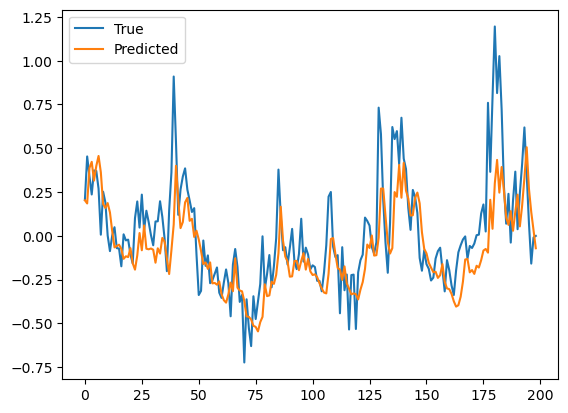

In [8]:
#LSTM Model
seq_length = 100

model = keras.models.Sequential([
    keras.layers.LSTM(12, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(12),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# pass tensors instead of numpy arrays
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
history = model.fit(X_train_tensor, y_train_tensor,validation_split=0.33, epochs=60, batch_size=16)
y_pred = model.predict(X_test_tensor)
y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency

DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
DataProcess.plot(y_test_tensor, y_pred)

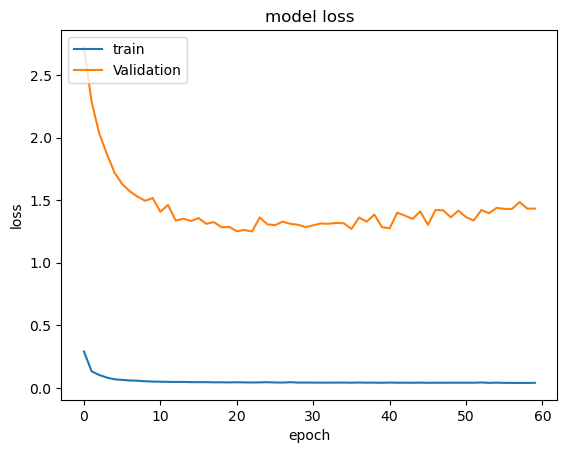

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [13]:
def lstm_init(units):
    model = keras.models.Sequential([
    keras.layers.LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    keras.layers.LSTM(units),
    keras.layers.Dense(1)])
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [ ]:
for units in len(0,30):
    X_train, X_test, y_train, y_test = DataProcess.preprocess_data(spyHistIV, 'SPY', seq_length=60, splits=5, window=21) #preprocess spy 
    X_train_reshape = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test_reshape = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])


    model = lstm_init(units)
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = map(lambda x: tf.convert_to_tensor(x, dtype=tf.float32), [X_train, y_train, X_test, y_test])
    history = model.fit(X_train_tensor, y_train_tensor,validation_split=0.33, epochs=60, batch_size=16)
    y_pred = model.predict(X_test_tensor)
    y_test_tensor = np.array(y_test_tensor)  # Ensure y_test is a numpy array for consistency
    
    DataProcess.evaluate_regression_metrics(y_test_tensor, y_pred)
    DataProcess.plot(y_test_tensor, y_pred)
        
])